In [6]:
# caslculate eigen values and eigen vectro of matrix A
import numpy as np

l = [
    [2, 1],
    [1, 2]
]
A = np.array(l)

eigenvalues, eigenvectors = np.linalg.eig(A)
print(f"eigenvalues[0]: {eigenvalues[0]}")
print(f"eigenvectors[0]: \n{eigenvectors[0]}")

print(f"eigenvalues[1]: {eigenvalues[1]}")
print(f"eigenvectors[1]: \n{eigenvectors[1]}")

eigenvalues[0]: 3.0
eigenvectors[0]: 
[ 0.70710678 -0.70710678]
eigenvalues[1]: 1.0
eigenvectors[1]: 
[0.70710678 0.70710678]


X_meaned:
[[ 0.69  0.49]
 [-1.31 -1.21]
 [ 0.39  0.99]
 [ 0.09  0.29]
 [ 1.29  1.09]
 [ 0.49  0.79]
 [ 0.19 -0.31]
 [-0.81 -0.81]
 [-0.31 -0.31]
 [-0.71 -1.01]]
cov_matrix: 
[[0.61655556 0.61544444]
 [0.61544444 0.71655556]]
eigenvalues: [0.0490834  1.28402771]
eigenvectors: 
[[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]
idx: [1 0]
principal_component: 
[-0.6778734  -0.73517866]
X_reduced: 
[-0.82797019  1.77758033 -0.99219749 -0.27421042 -1.67580142 -0.9129491
  0.09910944  1.14457216  0.43804614  1.22382056]


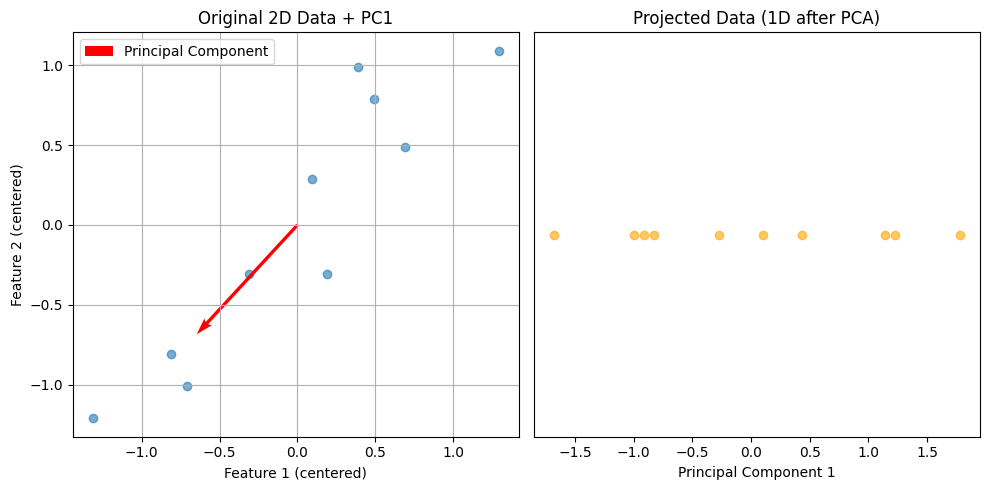

Old 2D data:
[[2.5 2.4]
 [0.5 0.7]
 [2.2 2.9]
 [1.9 2.2]
 [3.1 3. ]
 [2.3 2.7]
 [2.  1.6]
 [1.  1.1]
 [1.5 1.6]
 [1.1 0.9]] 
New 1D transformed data:
[-0.82797019  1.77758033 -0.99219749 -0.27421042 -1.67580142 -0.9129491
  0.09910944  1.14457216  0.43804614  1.22382056] 


In [12]:
# Example1
# Following is an application of eigen values/vector in PCA

import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    # height, weight
    [2.5, 2.4], # person1
    [0.5, 0.7], # person2
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2, 1.6],
    [1, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]
])

# Step 1: Standardization: Center the data (remove the mean)
X_meaned = X - np.mean(X, axis=0)
print(f"X_meaned:\n{X_meaned}")

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_meaned, rowvar=False)
print(f"cov_matrix: \n{cov_matrix}")

# Step 3: Compute eigenvalues and eigenvectors of cov_matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(f"eigenvalues: {eigenvalues}")
print(f"eigenvectors: \n{eigenvectors}")


# Step 4: Choose the top eigenvector (principal component)
idx = np.argsort(eigenvalues)[::-1]
print(f"idx: {idx}")
principal_component = eigenvectors[:, idx[0]]
print(f"principal_component: \n{principal_component}")

# Step 6: Project data onto principal component (1D representation)
X_reduced = X_meaned @ principal_component
print(f"X_reduced: \n{X_reduced}")

####################################################
# Plot original and projected data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_meaned[:, 0], X_meaned[:, 1], alpha=0.6)
# plt.quiver(0, 0, principal_component[0], principal_component[1],
#            color='r', scale=3, label='Principal Component')
plt.quiver(0, 0, principal_component[0], principal_component[1],
           color='r', scale=3, label='Principal Component')

plt.title("Original 2D Data + PC1")
plt.xlabel('Feature 1 (centered)')
plt.ylabel('Feature 2 (centered)')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_reduced, np.zeros_like(X_reduced), color='orange', alpha=0.6)
plt.title("Projected Data (1D after PCA)")
plt.xlabel('Principal Component 1')
plt.yticks([])

plt.tight_layout()
plt.show()
############################################

print(f"Old 2D data:\n{X} ")
print(f"New 1D transformed data:\n{X_reduced} ")

Covariance matrix:
 [[1.01010101 0.99826671]
 [0.99826671 1.01010101]]

Eigenvalues:
 [0.0118343  2.00836772]

Eigenvectors:
 [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


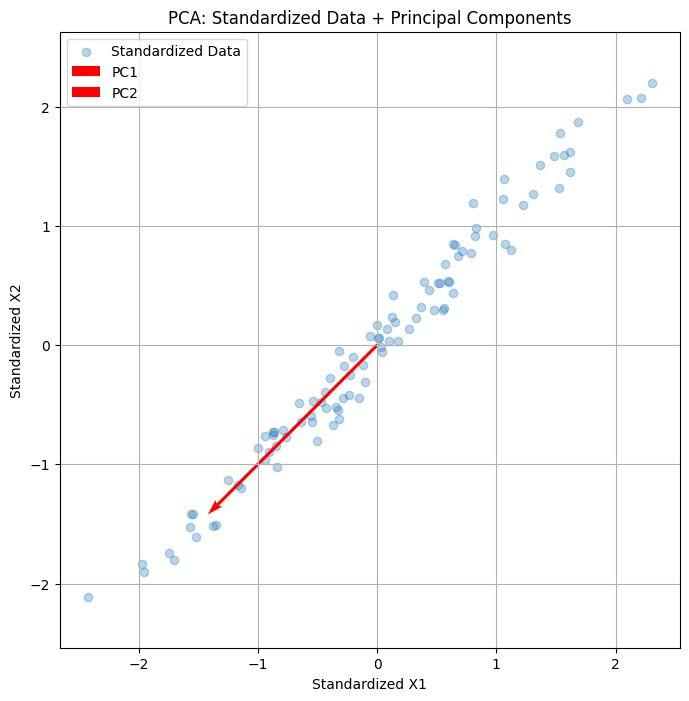


Recast Data (PCA transformed data):
 [[-0.797 -0.053]
 [-2.03   0.102]
 [ 0.338 -0.019]
 [-2.941 -0.026]
 [ 0.212  0.071]]


In [1]:
# Example2

import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic 2D data
np.random.seed(42)
X = np.random.randn(100, 2) @ np.array([[3, 1], [1, 0.5]]).T

# Step 1: Standardization
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_standardized = (X - X_mean) / X_std

# Step 2: Covariance Matrix Computation
cov_matrix = np.cov(X_standardized.T)
print("Covariance matrix:\n", cov_matrix)

# Step 3: Eigen decomposition of cov matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nEigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

# Step 4: Create feature vector (select top k eigenvectors)
# Sort by eigenvalue
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

# Keep both components (or you can keep 1 to reduce dim)
feature_vector = eigenvectors

# Step 5: Recast the Data Along the Principal Components Axes
X_pca = X_standardized @ feature_vector

# Plot original standardized data and PCA projection
plt.figure(figsize=(8,8))

# Original standardized data
plt.scatter(X_standardized[:,0], X_standardized[:,1], alpha=0.3, label="Standardized Data")

# Plot principal axes
origin = np.zeros(2)
for i in range(2):
    vec = eigenvectors[:, i] * eigenvalues[i]
    plt.quiver(*origin, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.005, label=f'PC{i+1}')

plt.title("PCA: Standardized Data + Principal Components")
plt.xlabel("Standardized X1")
plt.ylabel("Standardized X2")
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

# Also print the recast data
print("\nRecast Data (PCA transformed data):\n", np.round(X_pca[:5], 3))  # show first 5 rows
